# <div align="center"><span style="color:Purple">**<i>Flats Uncleaned Dataset</i>**</span> </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# <span style= 'color:maroon'>1. Loading the data</span>

In [2]:
path = r"data\surat_uncleaned.csv"
df = pd.read_csv(path)
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [4]:
df.head(10)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
5,"2 BHK Apartment for Sale in Anand Aspire, Jaha...",Super Area,1265 sqft,Unfurnished,Poss. by Dec '25,New Property,Anand Aspire,2,Multistorey Apartment for Sale in Jahangirabad...,"₹3,411 per sqft",₹43.2 Lac
6,3 BHK Villa for Sale in Dindoli Surat,Carpet Area,1404 sqft,Unfurnished,Poss. by Jun '24,New Property,East,Main Road,contraction,NaN,₹42.1 Lac
7,Office Space for Sale in Vesu Surat,Carpet Area,700 sqft,New Property,Poss. by Sep '25,7 out of 10,1,NaN,"best commercial for business ,investors ,busin...","₹3,392 per sqft",₹44.1 Lac
8,"2 BHK Apartment for Sale in Orchid Gardenia, P...",Super Area,1180 sqft,Orchid Gardenia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,751 per sqft",₹44.3 Lac
9,2 BHK Apartment for Sale in Palanpur Surat,Carpet Area,720 sqft,New Property,Poss. by Dec '25,3 out of 14,Unfurnished,East,"Irrespective of the business branch, the our g...","₹3,200 per sqft",₹40 Lac


In [5]:
df.tail(10)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
4515,"4 BHK Apartment for Sale in Happy Astoria, Ves...",Super Area,3000 sqft,New Property,Poss. by Nov '28,5 out of 12,Unfurnished,East,Looking for a 4 bhk property for sale in surat...,"₹6,200 per sqft",₹1.86 Cr
4516,"3 BHK Apartment for Sale in Samprati Palace, V...",Super Area,2620 sqft,Resale,Ready to Move,5 out of 12,Unfurnished,East,The beautifully designed granite flooring enha...,"₹6,031 per sqft",₹1.58 Cr
4517,"4 BHK Apartment for Sale in Samprati Palace, V...",Super Area,3400 sqft,Resale,Ready to Move,5 out of 12,Unfurnished,South,Looking for a 4 bhk property for sale in surat...,"₹6,000 per sqft",₹2.04 Cr
4518,4 BHK Apartment for Sale in Vesu Surat,Carpet Area,2475 sqft,New Property,Poss. by Dec '25,5 out of 11,Unfurnished,North - East,Amid the hustle and bustle of the fastpaced ci...,NaN,Call for Price
4519,4 BHK Apartment for Sale in Vesu Surat,Carpet Area,1870 sqft,New Property,Poss. by Dec '25,6 out of 11,Unfurnished,North - East,"Check out Anand Happy Astoria in Vesu, one of ...",NaN,Call for Price
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price
4524,4 BHK Apartment for Sale in Roongta Green Vall...,Super Area,4500 sqft,New Property,Ready to Move,3 out of 12,Unfurnished,North,Roongta Green Valley is one of the popular res...,NaN,Call for Price


In [6]:
print("\nDataset Dimensions:", df.shape)


Dataset Dimensions: (4525, 11)


In [7]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['property_name', 'areaWithType', 'square_feet', 'transaction', 'status', 'floor', 'furnishing', 'facing', 'description', 'price_per_sqft', 'price']


In [8]:
print("\nIndexes:", df.index)


Indexes: RangeIndex(start=0, stop=4525, step=1)


In [9]:
print("\nData Types:\n", df.dtypes)  # some the data need to be converted(like the price)


Data Types:
 property_name     object
areaWithType      object
square_feet       object
transaction       object
status            object
floor             object
furnishing        object
facing            object
description       object
price_per_sqft    object
price             object
dtype: object


In [10]:
print("\nBasic Statistics:\n")
df.describe().T


Basic Statistics:



,count,unique,top,freq
property_name,4525,1992,3 BHK Apartment for Sale in Vesu Surat,93
areaWithType,4525,6,Super Area,2599
square_feet,4525,1399,1000 sqft,77
transaction,4421,38,Resale,2197
status,4524,138,Ready to Move,3078
floor,4480,222,Resale,431
furnishing,4185,78,Unfurnished,2322
facing,3936,176,East,1487
description,3154,2588,Multistorey apartment is available for sale. I...,35
price_per_sqft,4157,2134,"₹5,000 per sqft",64


In [11]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64


In [12]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Orchid Fantasia', 'Unfurnished',
       'Orchid Gardenia', 'Congo', 'Furnished', nan, 'Semi-Furnished',
       'Main Road, Garden/Park', '1', '3', '4', 'Yes', 'No',
       'Mahavir Nagar', '3 Covered', 'Shagun Residency', '2', 'Main Road',
       '10 m', 'Other', '1 Covered', 'Soham Elegance', 'Garden/Park',
       'Aakash Echo Point', 'Sundaram Residency', '5', 'Jolly Residency',
       'Mangalam Heights', 'Green City', 'Pool, Garden/Park, Main Road',
       '6', 'Co-operative Society', 'Vatsalya Bungalows', '20 Covered,',
       'Raghuvir Silverstone', '8 m', 'Casa Rivera'], dtype=object)

In [13]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [14]:
df['status'].unique()

array(["Poss. by Oct '24", "Poss. by Jan '26", 'Ready to Move',
       'New Property', "Poss. by Dec '25", "Poss. by Jun '24",
       "Poss. by Sep '25", "Poss. by Feb '26", '1 out of 7',
       "Poss. by Jul '24", "Poss. by Dec '26", "Poss. by Apr '25",
       "Poss. by Jan '25", 'Freehold', '21 X 50.2', "Poss. by Dec '24",
       "Poss. by Aug '25", "Poss. by Feb '25", '3 out of 10', 'Resale',
       'Co-operative Society', '120 X 105', '3 out of 7',
       "Poss. by May '26", '36 X 15', "Poss. by Aug '24", '2',
       '3 out of 3', '52.5 X 32.1', '3 out of 5', '5 out of 5',
       '12 X 35.92', '13 out of 14', '7.29 X 14', '4 out of 5',
       'Ground out of 1', '3 out of 4', 'Ground out of 10',
       'Ground out of 2', '20 X 40', '16.4 X 60', '11 out of 14',
       '9.42 X 126', '25 X 12', nan, '2 out of 4', '54 X 15', '21 X 57',
       'Power Of Attorney', "Poss. by Jul '25", "Poss. by May '25",
       "Poss. by Mar '26", "Poss. by Jun '26", "Poss. by Nov '24",
       '26.7 X 55.

In [15]:
df['facing'].unique()

array(['West', 'South -West', 'East', '2', 'Main Road', nan,
       'North - East', 'South - East', '1', 'Freehold', 'Garden/Park',
       '3', 'North - West', 'South', '6', 'Co-operative Society',
       'Garden/Park, Main Road', '1 Covered', 'No', '30 m', 'North',
       'Varni Siddheshwar Heights', '5', 'Salasar Icon', 'Green Valley',
       'Shyam enclave', 'Rajhans Platinum', 'Vitthal Bunglows', '1 Open',
       'Royal Nest', 'Rajhans Wings', '2 Open',
       'Gordhan Green Valley Mangalam Park Bldg S',
       'Apt Swaminagar Society', 'Swagat Clifton', 'Akash',
       'Green Arcade Phase 1 And 2', 'Satyam Tower', '4',
       'Suryanjali Residency', 'GHB Mukhya Mantri Gruh Yojana',
       'Vibrant Eco Park', 'Madhav Residency', 'Shiv Drashti Residency',
       'Gruham Luxuria', 'SHANKHESHWER COMPLAX', 'JT Stuti Highland',
       'Times Galaxy', '100 m', 'Savani Prayosha Pride',
       'Shayona Janki Residency', 'Sundaram Residency', '6 m',
       'Silicon Palm', 'Raj Abhishek City

In [16]:
df[["price"]].head()


,price
0,₹33.8 Lac
1,₹45.4 Lac
2,₹44.6 Lac
3,₹47 Lac
4,₹45 Lac


In [17]:
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True)
df[["price"]].head()

,price
0,33.8
1,45.4
2,44.6
3,47
4,45


In [18]:
df['square_feet'] = df['square_feet'].str.replace(r'[^\d.]', '', regex=True)
df[["square_feet"]].head()

,square_feet
0,644
1,1278
2,1173
3,700
4,1250


In [19]:
print("Unique values before replacement:")
print(df['areaWithType'].unique())

Unique values before replacement:
['Carpet Area' 'Super Area' 'Plot Area' 'Built Area' 'Transaction'
 'Status']


areaWithType columns which should be filled only with  3 values--> Carpet Area, Super Area and Plot Area.
other than those 3 values will be counted as null.

In [20]:
valid_values = ['Carpet Area', 'Super Area']
df['areaWithType'] = df['areaWithType'].apply(lambda x: x if x in valid_values else np.nan)

In [21]:
print("\nUnique values after replacement:")
print(df['areaWithType'].unique())


Unique values after replacement:
['Carpet Area' 'Super Area' nan]


In [22]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Orchid Fantasia', 'Unfurnished',
       'Orchid Gardenia', 'Congo', 'Furnished', nan, 'Semi-Furnished',
       'Main Road, Garden/Park', '1', '3', '4', 'Yes', 'No',
       'Mahavir Nagar', '3 Covered', 'Shagun Residency', '2', 'Main Road',
       '10 m', 'Other', '1 Covered', 'Soham Elegance', 'Garden/Park',
       'Aakash Echo Point', 'Sundaram Residency', '5', 'Jolly Residency',
       'Mangalam Heights', 'Green City', 'Pool, Garden/Park, Main Road',
       '6', 'Co-operative Society', 'Vatsalya Bungalows', '20 Covered,',
       'Raghuvir Silverstone', '8 m', 'Casa Rivera'], dtype=object)

In [23]:
valid_values = ['New Property', 'Resale']
df['transaction'] = df['transaction'].apply(lambda x: x if x in valid_values else np.nan)

In [24]:
df['transaction'].unique() #after replacement

array(['New Property', 'Resale', nan], dtype=object)

In [25]:
df[['status']].head()

,status
0,Poss. by Oct '24
1,Poss. by Jan '26
2,Ready to Move
3,Ready to Move
4,New Property


In [26]:
df['status'] = df['status'].apply(lambda x: 'PreOrder' if isinstance(x, str) and x.startswith('Poss') else x)

In [27]:
df['status'].unique() # before changing


array(['PreOrder', 'Ready to Move', 'New Property', '1 out of 7',
       'Freehold', '21 X 50.2', '3 out of 10', 'Resale',
       'Co-operative Society', '120 X 105', '3 out of 7', '36 X 15', '2',
       '3 out of 3', '52.5 X 32.1', '3 out of 5', '5 out of 5',
       '12 X 35.92', '13 out of 14', '7.29 X 14', '4 out of 5',
       'Ground out of 1', '3 out of 4', 'Ground out of 10',
       'Ground out of 2', '20 X 40', '16.4 X 60', '11 out of 14',
       '9.42 X 126', '25 X 12', nan, '2 out of 4', '54 X 15', '21 X 57',
       'Power Of Attorney', '26.7 X 55.6', '41 X 20', '5 out of 13',
       '36 X 21', '19.2 X 54.8', '8 out of 14', '26.7 X 54.9', '38 X 21',
       '2 out of 13', '135 X 75', '38 X 20', '114 X 60', '45 X 40',
       '40 X 21', '37 X 26', '180 X 22.5', '4 out of 14', '114 X 14',
       'Const. Age New Construction', '285 X 51', '8 out of 10',
       '6 out of 11', 'Ground out of 5', '10 out of 11', '5 out of 14',
       '60 X 28', '37 X 20', '13.3 X 135', '9 out of 11', 

In [28]:
valid_values = ['Ready to Move', 'PreOrder', 'Freehold', 'Power of Attorney', 'Co-operative Society']
df['status'] = df['status'].apply(lambda x: x if x in valid_values else np.nan)

In [29]:
df['status'].unique() # after

array(['PreOrder', 'Ready to Move', nan, 'Freehold',
       'Co-operative Society'], dtype=object)

In [30]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', 'Unfurnished',
       'New Property', '7 out of 10', '3 out of 14', '6 out of 13',
       '1 out of 1', '1 out of 13', '4 out of 7', '3 out of 3',
       '2 out of 6', '3 out of 5', '2 out of 5', '3 out of 12',
       '5 out of 5', 'Resale', 'Ground out of 1',
       'Lower Basement out of 7', '1 out of 5', '7 out of 14',
       '9 out of 14', '5 out of 12', '7 out of 13', '1 out of 2',
       '2 out of 10', 'Freehold', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       'Upper Basement out of 5', '3 out of 10', '1 out of 3',
       '4 out of 4', 'Ground out of 2', 'Lower Basement out of 2',
       'Ground out of 4', nan, 'Ground out of 5', '4 out of 10',
       'Ground out of 14', 'Ground out of 6', '5 out of 6', '8 out of 9',
       '4 out of 5', '2 out of 7', '7 out of 7', 'Ground out of 3',
       '4 out of 8', '8

In [31]:
pattern = r'^\d+ out of \d+$'
df['floor'] = df['floor'].apply(lambda x: x if pd.notnull(x) and pd.Series(x).str.match(pattern).any() else np.nan)

In [32]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', nan, '7 out of 10',
       '3 out of 14', '6 out of 13', '1 out of 1', '1 out of 13',
       '4 out of 7', '3 out of 3', '2 out of 6', '3 out of 5',
       '2 out of 5', '3 out of 12', '5 out of 5', '1 out of 5',
       '7 out of 14', '9 out of 14', '5 out of 12', '7 out of 13',
       '1 out of 2', '2 out of 10', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       '3 out of 10', '1 out of 3', '4 out of 4', '4 out of 10',
       '5 out of 6', '8 out of 9', '4 out of 5', '2 out of 7',
       '7 out of 7', '4 out of 8', '8 out of 14', '6 out of 7',
       '7 out of 11', '2 out of 3', '1 out of 7', '1 out of 6',
       '9 out of 11', '14 out of 14', '5 out of 14', '1 out of 8',
       '5 out of 7', '8 out of 12', '2 out of 2', '7 out of 12',
       '3 out of 6', '1 out of 12', '16 out of 19', '13 out of 13',
       '6 ou

In [33]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [34]:
valid_values = ['Furnished', 'Unfurnished', 'Semi-Furnished']
df['furnishing'] = df['furnishing'].apply(lambda x: x if x in valid_values else np.nan)

In [35]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', nan, 'Furnished'], dtype=object)

In [36]:
#for the facing
valid_values = [
    'North', 'North - East', 'East', 'South - East',
    'South', 'South - West', 'West', 'North - West'
]

df['facing'] = df['facing'].apply(lambda x: x if x in valid_values else np.nan)

In [37]:
df['facing'].unique()

array(['West', nan, 'East', 'North - East', 'South - East',
       'North - West', 'South', 'North'], dtype=object)

In [38]:
df = df.drop("description", axis=1)

In [39]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,PreOrder,5 out of 10,Unfurnished,West,"₹2,891 per sqft",33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,PreOrder,6 out of 14,Unfurnished,NaN,"₹3,551 per sqft",45.4
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",44.6
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,6 out of 14,Unfurnished,East,"₹3,966 per sqft",47
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,NaN,NaN,NaN,NaN,NaN,"₹3,600 per sqft",45
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000,New Property,PreOrder,5 out of 12,Unfurnished,South - East,NaN,
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600,New Property,PreOrder,5 out of 16,Unfurnished,South - East,NaN,
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250,New Property,PreOrder,7 out of 13,Unfurnished,North - East,NaN,
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,


In [40]:
df['price_per_sqft'] = df['price_per_sqft'].str.replace(r'[^\d.]', '', regex=True)
df[["price_per_sqft"]].head()

,price_per_sqft
0,2891
1,3551
2,3800
3,3966
4,3600


In [41]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,PreOrder,5 out of 10,Unfurnished,West,2891,33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,PreOrder,6 out of 14,Unfurnished,NaN,3551,45.4
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,3800,44.6
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,6 out of 14,Unfurnished,East,3966,47
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,NaN,NaN,NaN,NaN,NaN,3600,45
...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000,New Property,PreOrder,5 out of 12,Unfurnished,South - East,NaN,
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600,New Property,PreOrder,5 out of 16,Unfurnished,South - East,NaN,
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250,New Property,PreOrder,7 out of 13,Unfurnished,North - East,NaN,
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,NaN,


In [42]:
df.isnull().sum()

property_name        0
areaWithType       255
square_feet          0
transaction        842
status             247
floor             1289
furnishing        1255
facing            2497
price_per_sqft     368
price                0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   property_name   4525 non-null   int64
 1   areaWithType    4525 non-null   int64
 2   square_feet     4525 non-null   int64
 3   transaction     4525 non-null   int64
 4   status          4525 non-null   int64
 5   floor           4525 non-null   int64
 6   furnishing      4525 non-null   int64
 7   facing          4525 non-null   int64
 8   price_per_sqft  4525 non-null   int64
 9   price           4525 non-null   int64
dtypes: int64(10)
memory usage: 353.6 KB


In [45]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,705,0,1105,0,2,111,2,6,566,332
1,658,1,187,0,2,130,2,7,819,445
2,819,1,116,1,3,114,1,0,932,438
3,744,0,1140,0,3,130,2,0,1014,456
4,816,1,166,2,4,175,3,7,838,441
...,...,...,...,...,...,...,...,...,...,...
4520,1963,0,540,0,2,113,2,5,2134,0
4521,1758,1,878,0,2,117,2,5,2134,0
4522,1899,0,618,0,2,142,2,2,2134,0
4523,1961,0,864,0,3,146,2,3,2134,0


C:\Users\bbuser\AppData\Local\Temp\ipykernel_4792\3470331172.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.get("price"), bins = 50, kde=True)


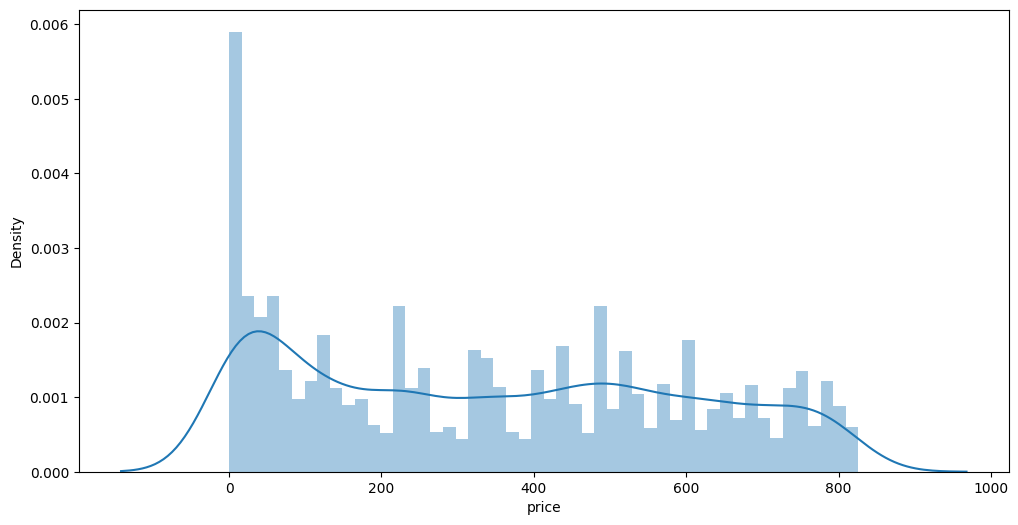

In [46]:
# View the Target column - 'price'

f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df.get("price"), bins = 50, kde=True)

plt.show()

In [47]:
# New column 'Price'
df['New_Price'] = (df['square_feet'] * df['price_per_sqft'] / 100000).round(2)

In [48]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price,New_Price
0,705,0,1105,0,2,111,2,6,566,332,6.25
1,658,1,187,0,2,130,2,7,819,445,1.53
2,819,1,116,1,3,114,1,0,932,438,1.08
3,744,0,1140,0,3,130,2,0,1014,456,11.56
4,816,1,166,2,4,175,3,7,838,441,1.39
...,...,...,...,...,...,...,...,...,...,...,...
4520,1963,0,540,0,2,113,2,5,2134,0,11.52
4521,1758,1,878,0,2,117,2,5,2134,0,18.74
4522,1899,0,618,0,2,142,2,2,2134,0,13.19
4523,1961,0,864,0,3,146,2,3,2134,0,18.44


In [49]:
df.drop(["price"], axis=1, inplace=True)

In [50]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,New_Price
0,705,0,1105,0,2,111,2,6,566,6.25
1,658,1,187,0,2,130,2,7,819,1.53
2,819,1,116,1,3,114,1,0,932,1.08
3,744,0,1140,0,3,130,2,0,1014,11.56
4,816,1,166,2,4,175,3,7,838,1.39
...,...,...,...,...,...,...,...,...,...,...
4520,1963,0,540,0,2,113,2,5,2134,11.52
4521,1758,1,878,0,2,117,2,5,2134,18.74
4522,1899,0,618,0,2,142,2,2,2134,13.19
4523,1961,0,864,0,3,146,2,3,2134,18.44


In [51]:
df.isnull().sum()

property_name     0
areaWithType      0
square_feet       0
transaction       0
status            0
floor             0
furnishing        0
facing            0
price_per_sqft    0
New_Price         0
dtype: int64

In [54]:
df.isnull().sum()

property_name     0
areaWithType      0
square_feet       0
transaction       0
status            0
floor             0
furnishing        0
facing            0
price_per_sqft    0
New_Price         0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   int64  
 1   areaWithType    4525 non-null   int64  
 2   square_feet     4525 non-null   int64  
 3   transaction     4525 non-null   int64  
 4   status          4525 non-null   int64  
 5   floor           4525 non-null   int64  
 6   furnishing      4525 non-null   int64  
 7   facing          4525 non-null   int64  
 8   price_per_sqft  4525 non-null   int64  
 9   New_Price       4525 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 353.6 KB


sns.scatterplot(data=df, x="square_feet", y="Price", hue="areaWithType", palette="Set1")
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) from the DataFrame
X = df.drop('New_Price', axis=1)
y = df['New_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 6.65
R-squared (R2): 0.87


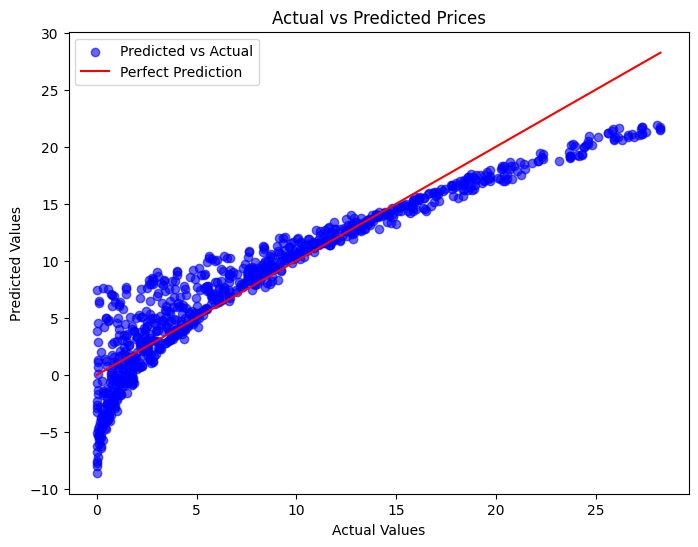

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

###### ploting the linear regression between actual data and predicted data(line)
we have notice that the actual data is fit the regression line 